# Regularized logistic regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plot_utils
from logistic_regressor import LogisticRegressor

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...


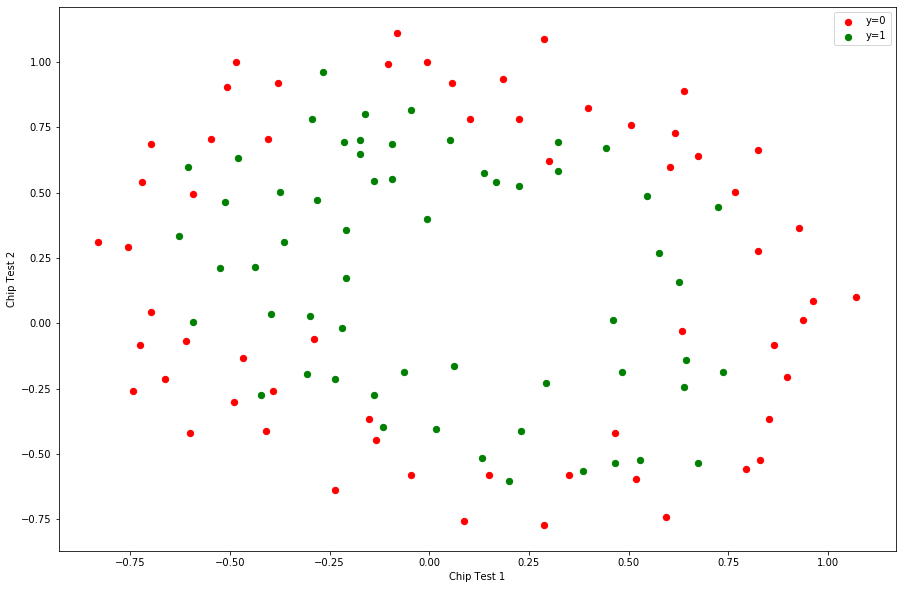

In [2]:
##================ Part 0: Reading data and plotting ==================#

import pandas as pd
import numpy as np

data = pd.read_csv('ex2data2.txt')
X = np.vstack([data.x1,data.x2]).T
y = data.y

print('Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...')
plot_utils.plot_twoclass_data(X,y,'Chip Test 1', 'Chip Test 2',['y=0','y=1'])
plt.show()

In [8]:
y.shape

(118,)

In [3]:
XX = np.vstack([np.ones((X.shape[0],)),X.T]).T
from logistic_regressor import RegLogisticRegressor
log_reg1 = RegLogisticRegressor()
theta = np.ones((XX.shape[1],))
loss = log_reg1.loss(theta,XX,y,100)
grad = log_reg1.grad_loss(theta,XX,y,100)

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48
Theta found by fmin_bfgs: [ 1.27268739  0.62557016  1.1809665  -2.01919822 -0.91761468 -1.43194199
  0.12375921 -0.36513086 -0.35703388 -0.17485805 -1.45843772 -0.05129676
 -0.61603963 -0.2746414  -1.19282569 -0.24270336 -0.20570022 -0.04499768
 -0.27782709 -0.29525851 -0.45613294 -1.04377851  0.02762813 -0.29265642
  0.01543393 -0.32759318 -0.14389199 -0.92460119]
Final loss = 0.4625


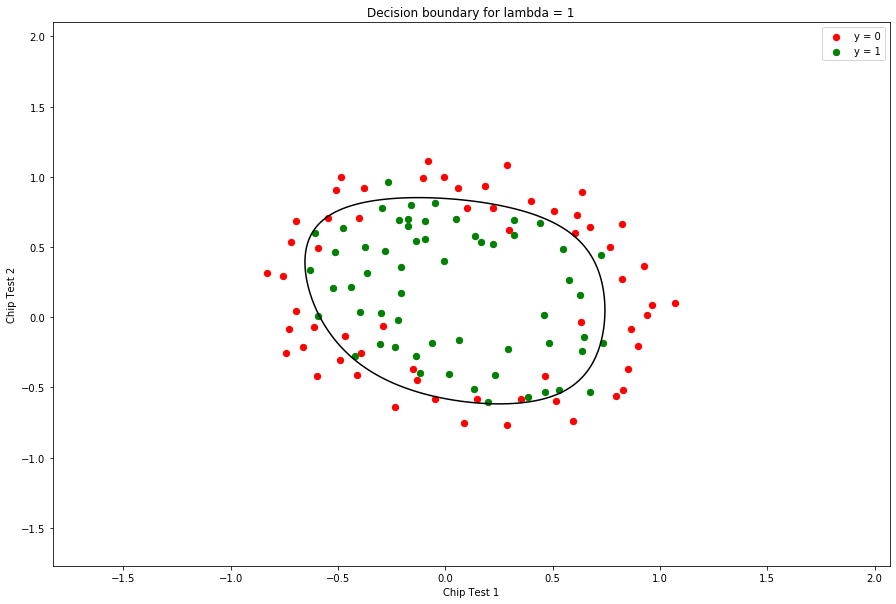

In [7]:
#================ Part 1: Compute cost and gradient ==================#
# open logistic_regressor.py and implement the regularized loss function 
# and gradient 

# map the features in ex2data2.txt into a pth order polynomial

import sklearn
from sklearn.preprocessing import PolynomialFeatures

# Map X onto polynomial features and normalize

p = 6
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly = poly.fit_transform(X)

# set up the data matrix (expanded basis functions) with the column of ones as intercept

XX = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T

# set up a regularized logistic regression model

from logistic_regressor import RegLogisticRegressor

reg_lr1 = RegLogisticRegressor()

# run fmin on the loss function and gradient 

reg = 1
theta_opt = reg_lr1.train(XX,y,reg=reg,num_iters=1000,norm=False)

# print the theta found and the final loss

print('Theta found by fmin_bfgs: %s' %theta_opt)
print("Final loss = %.4f" %reg_lr1.loss(theta_opt,XX,y,0.0))

# plot the decision boundary

plot_utils.plot_decision_boundary_poly(X,y,theta_opt,reg,p,'Chip Test 1', 'Chip Test 2',['y = 0','y = 1'])
plt.show()


In [5]:
# compute accuracy on training set
# implement the predict method in logistic_regressor.py

reg_lr1.theta = theta_opt
predy = reg_lr1.predict(XX)

# TODO: fill in the expression for accuracy of prediction
num_correct = np.sum(y == predy)
accuracy = float(num_correct) / y.shape[0]

print("Accuracy on the training set = %.4f" %accuracy)

Accuracy on the training set = 0.6102


# Comparing learned model with sklearn's logistic ridge regression

Theta found by sklearn with L2 reg: [[ 1.1421394   0.60141117  1.16712554 -1.87160974 -0.91574144 -1.26966693
   0.12658629 -0.3686536  -0.34511687 -0.17368655 -1.42387465 -0.04870064
  -0.60646669 -0.26935562 -1.16303832 -0.24327026 -0.20702143 -0.04326335
  -0.28028058 -0.286921   -0.46908732 -1.03633961  0.02914775 -0.29263743
   0.01728096 -0.32898422 -0.13801971 -0.93196832]]
Loss with sklearn theta: 0.4684


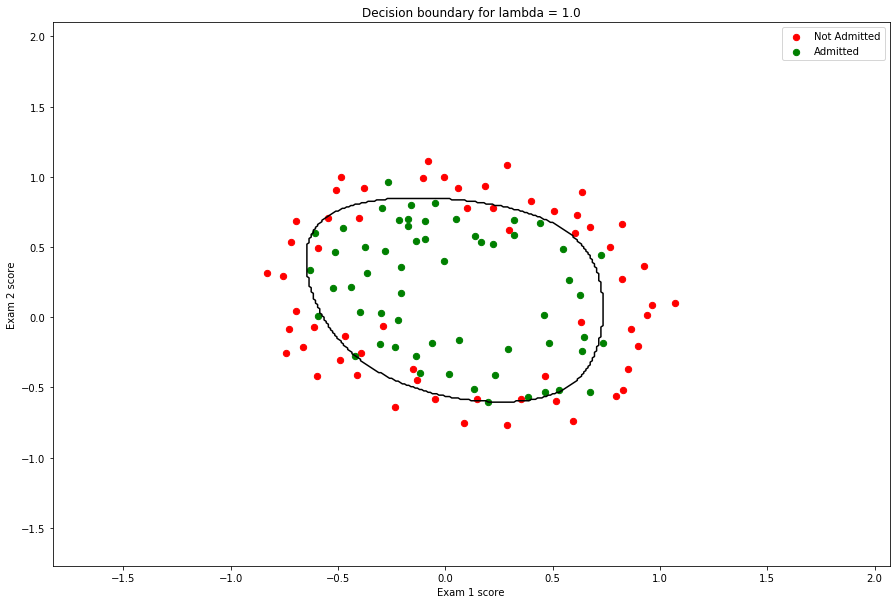

Computing regularization path ...


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


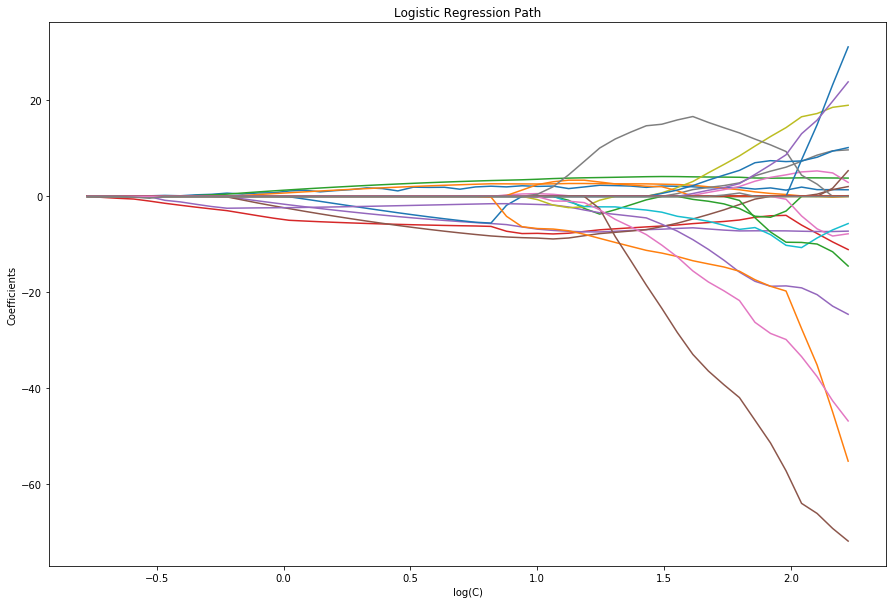

In [6]:
# Compare with model learned by sklearn's logistic regression with reg = 1/C
# the regularization parameter set below can be varied (on a logarithmic scale)

reg =1.0

# L2 regularization with sklearn LogisticRegression

from sklearn import linear_model
sk_logreg_l2 = linear_model.LogisticRegression(C=1.0/reg,solver='lbfgs',fit_intercept=False)
sk_logreg_l2.fit(XX,y)
print("Theta found by sklearn with L2 reg: %s" %sk_logreg_l2.coef_)
print("Loss with sklearn theta: %.4f" %reg_lr1.loss(sk_logreg_l2.coef_[0],XX,y,0.0))

plot_utils.plot_decision_boundary_sklearn_poly(X,y,sk_logreg_l2,reg,p,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
plt.show()

plot_utils.plot_regularization_path(XX,y)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Theta found by sklearn with L2 reg: [[  3.3978368    0.63449102   4.92179441  -4.82379918  -8.37954069
   -0.38564131   5.16455839   6.73248326  10.40474931  -5.01250696
    0.5120409    2.74824933 -10.21507628   0.07585035 -18.32292638
   -2.43751028  -4.74364488  12.15768566  -8.30764104 -14.61916707
   10.36811874 -16.52413768  -7.54079733  -2.51620494  11.62719514
  -16.84146729 -12.19648519   1.09862918]]
Loss with sklearn theta: 0.2959
Computing regularization path ...
Theta found by sklearn with L2 reg: [[ 3.74522253  2.0107989   4.61214155 -5.45414606 -6.67189659 -5.94010197
   2.151067   -0.10213815  2.45921341 -2.5147764  -3.80255072  2.98381388
  -3.77718734 -1.96294588 -6.31923347 -1.71938626 -0.86707608  4.99914053
  -3.62305722 -4.32524672  2.8515795  -5.47204508  0.45198499 -0.88342842
   3.20815872 -4.5010269  -3.62599862  0.26743957]]
Loss with sklearn theta: 0.3167
Computing regularization path ...


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Theta found by sklearn with L2 reg: [[ 1.1421394   0.60141117  1.16712554 -1.87160974 -0.91574144 -1.26966693
   0.12658629 -0.3686536  -0.34511687 -0.17368655 -1.42387465 -0.04870064
  -0.60646669 -0.26935562 -1.16303832 -0.24327026 -0.20702143 -0.04326335
  -0.28028058 -0.286921   -0.46908732 -1.03633961  0.02914775 -0.29263743
   0.01728096 -0.32898422 -0.13801971 -0.93196832]]
Loss with sklearn theta: 0.4684
Computing regularization path ...


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Theta found by sklearn with L2 reg: [[ 5.89106253e-01  1.95454002e-01  5.58913807e-01 -9.86107898e-01
  -3.61900628e-01 -5.82750147e-01 -2.51639321e-02 -1.58019487e-01
  -1.59981994e-01 -1.45612675e-01 -7.58932186e-01 -3.41689773e-02
  -2.88651654e-01 -9.74950793e-02 -6.16273324e-01 -1.80925636e-01
  -9.79992358e-02 -4.05896085e-02 -1.27023699e-01 -1.16537109e-01
  -3.39110258e-01 -5.60445739e-01  5.57877067e-05 -1.43900969e-01
   5.69591879e-04 -1.57722446e-01 -4.39086378e-02 -5.60735202e-01]]
Loss with sklearn theta: 0.5496
Computing regularization path ...


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Theta found by sklearn with L2 reg: [[ 0.21469236 -0.00761966  0.17611687 -0.4012903  -0.11745553 -0.23188083
  -0.06668596 -0.05584267 -0.06215384 -0.09710193 -0.31766892 -0.01468057
  -0.10913398 -0.03014551 -0.26764027 -0.11186999 -0.03627398 -0.02114738
  -0.04753651 -0.04038118 -0.18117647 -0.24308692 -0.00364108 -0.05525352
  -0.00101451 -0.06094026 -0.01293964 -0.26287463]]
Loss with sklearn theta: 0.6216
Computing regularization path ...


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


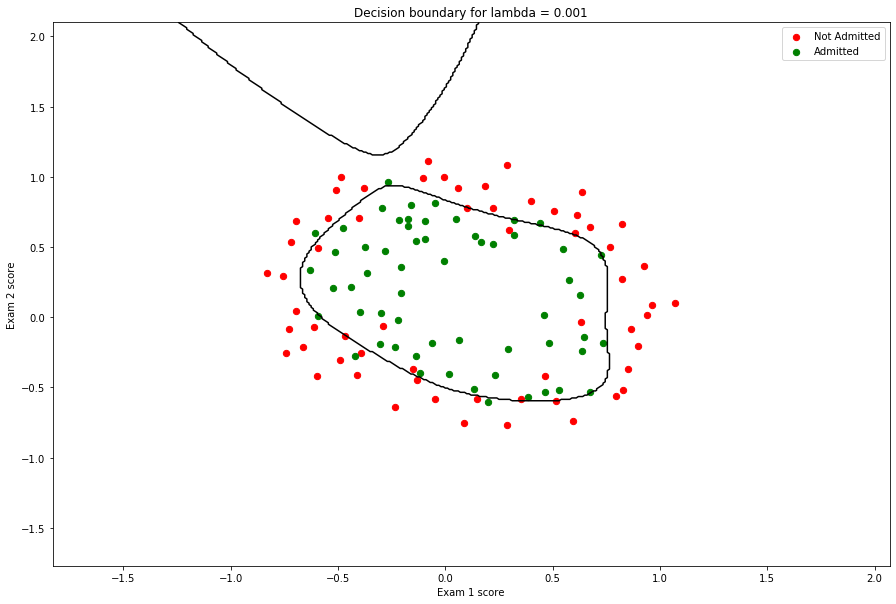

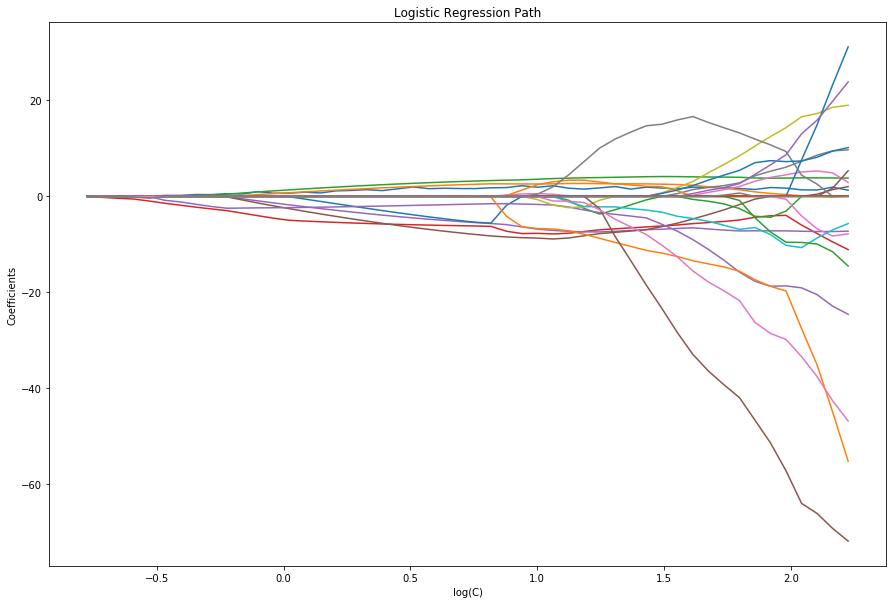

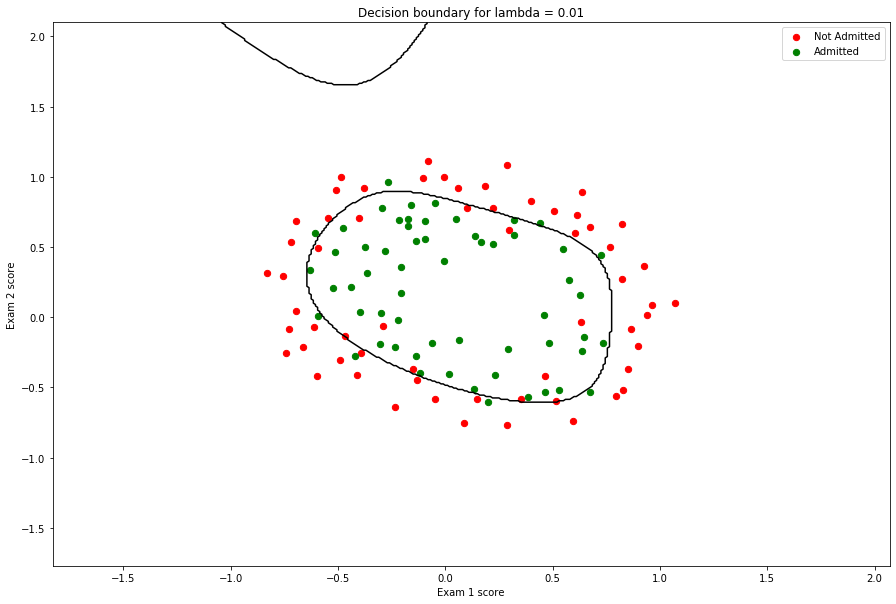

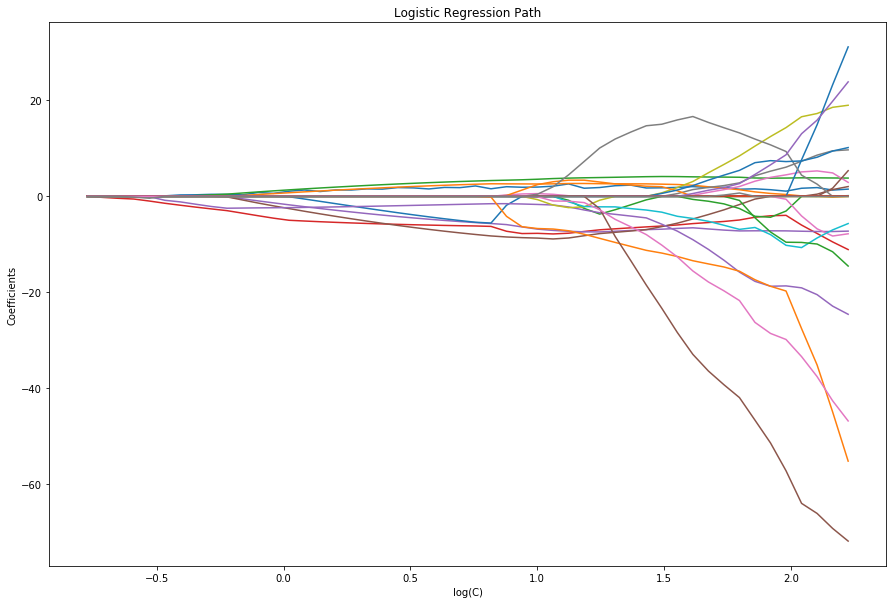

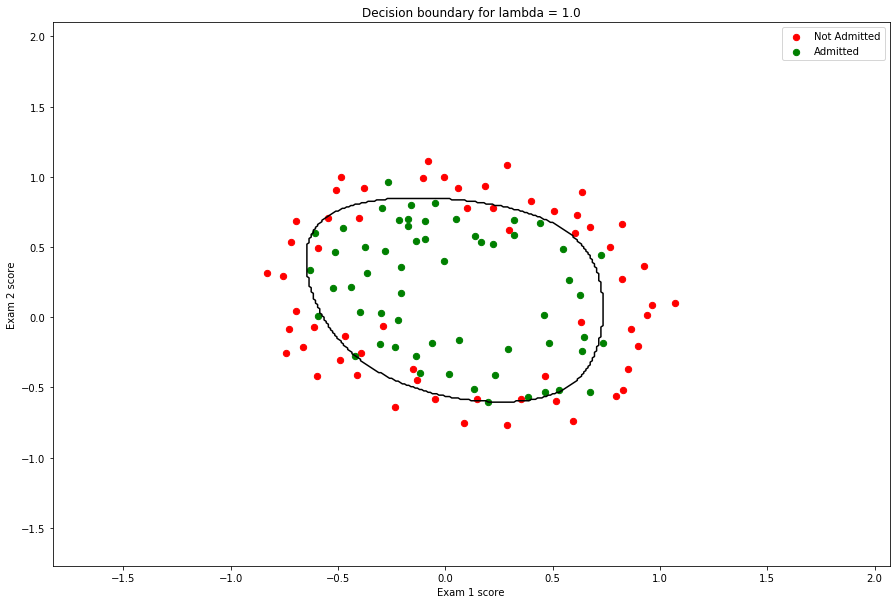

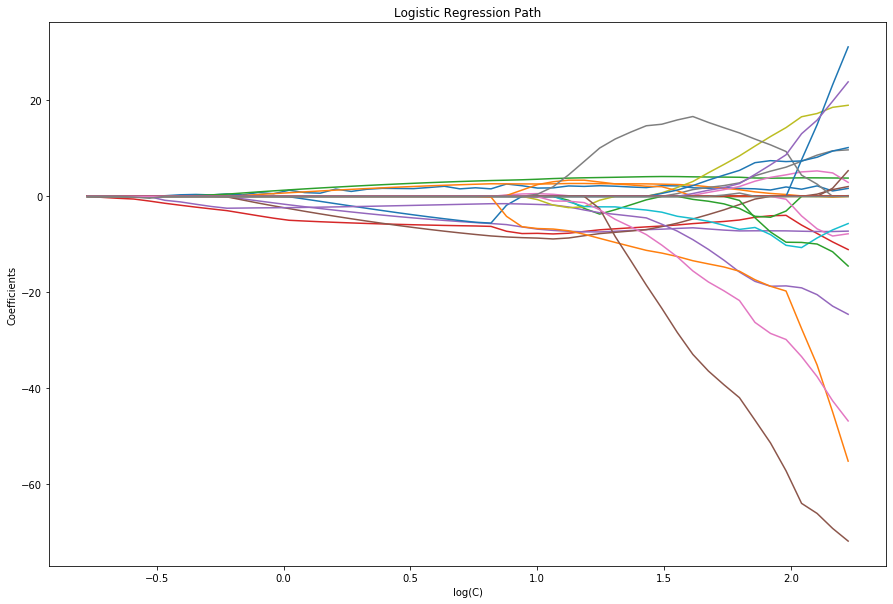

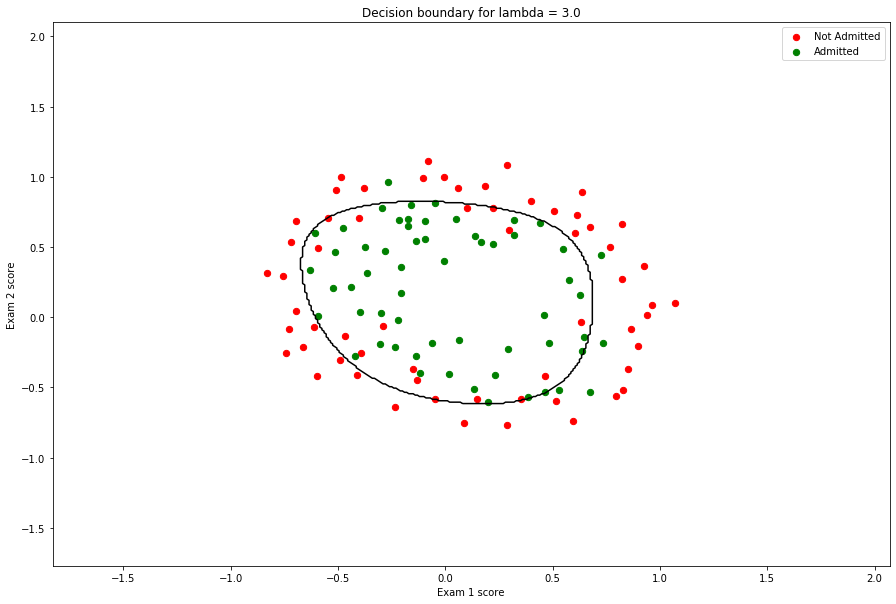

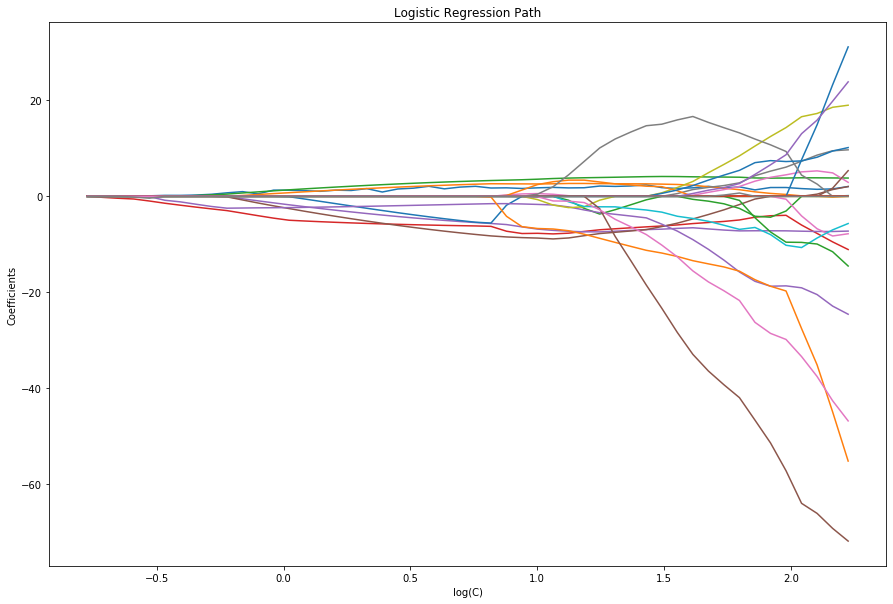

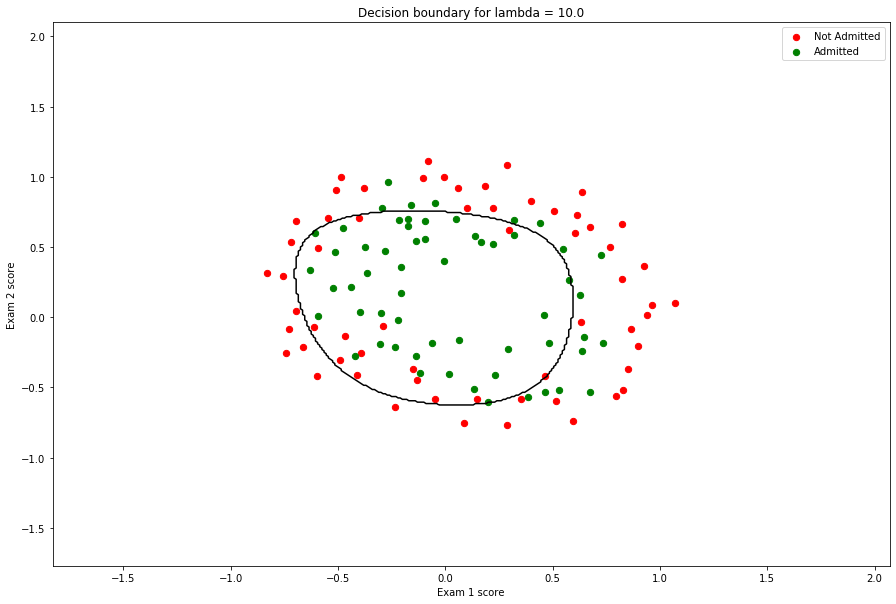

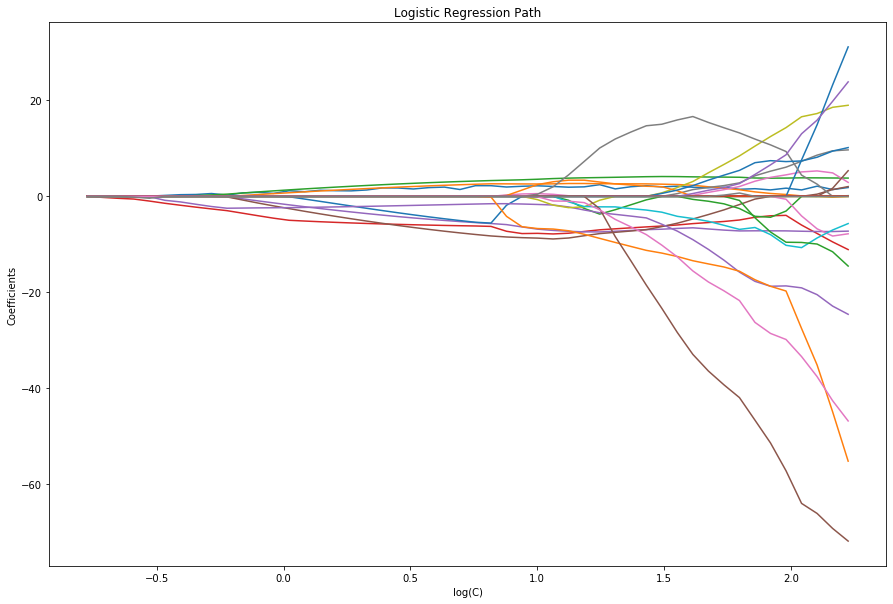

In [10]:
reg_l = [0.001,0.01,1.0,3.0,10.0]

# L2 regularization with sklearn LogisticRegression

from sklearn import linear_model

for reg in reg_l:
    sk_logreg_l2 = linear_model.LogisticRegression(C=1.0/reg,solver='lbfgs',fit_intercept=False)
    sk_logreg_l2.fit(XX,y)
    print("Theta found by sklearn with L2 reg: %s" %sk_logreg_l2.coef_)
    print("Loss with sklearn theta: %.4f" %reg_lr1.loss(sk_logreg_l2.coef_[0],XX,y,0.0))

    plot_utils.plot_decision_boundary_sklearn_poly(X,y,sk_logreg_l2,reg,p,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
    plt.savefig('decsion_boundry_reg = %d.png' %reg)
    #plt.show()

    plot_utils.plot_regularization_path(XX,y)
    plt.savefig('Coefficient_reg = %d.png' %reg)
    #plt.show()

# L1 regularized logistic regression

Theta found by sklearn with L1 reg: [[ 1.86942688  0.68652597  1.28029652 -4.86229269 -1.62168461 -2.34114353
   0.          0.          0.          0.          0.          0.
   0.          0.         -2.36837743  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
Loss with sklearn theta: 0.4382


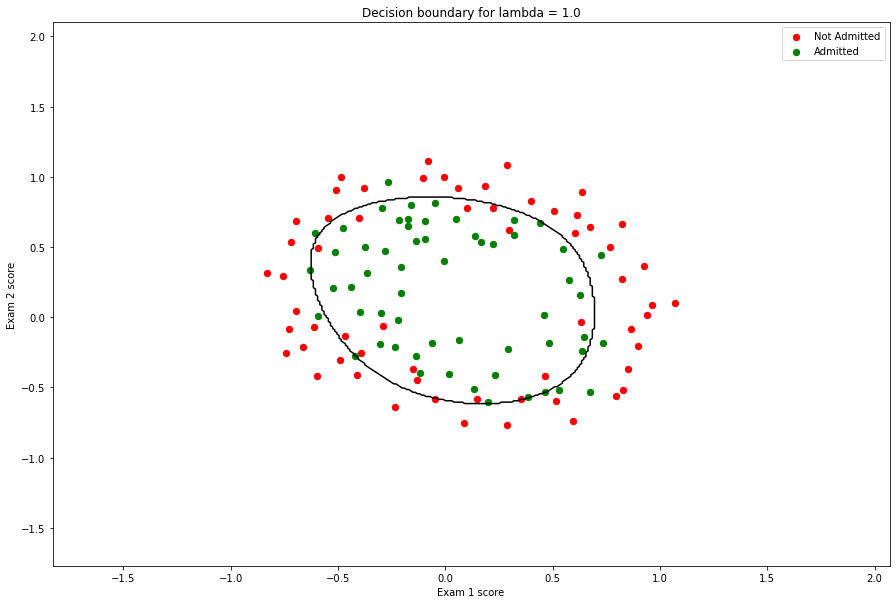

Computing regularization path ...


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


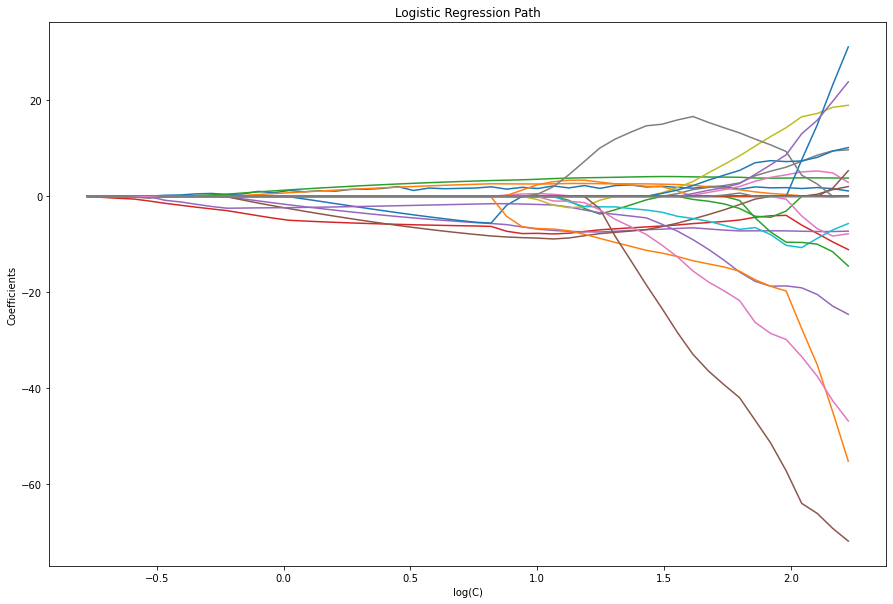

In [39]:
# L1 regularization witk sklearn LogisticRegression

sk_logreg_l1 = linear_model.LogisticRegression(C=1.0/reg,solver='liblinear',fit_intercept=False,penalty='l1')
sk_logreg_l1.fit(XX,y)
print("Theta found by sklearn with L1 reg: %s" %sk_logreg_l1.coef_)
print("Loss with sklearn theta: %.4f" %reg_lr1.loss(sk_logreg_l1.coef_[0],XX,y,0.0))

plot_utils.plot_decision_boundary_sklearn_poly(X,y,sk_logreg_l1,reg,p,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
plt.show()
# plot regularization paths for L1 regression
# Exploration of L1 regularization 
# 
plot_utils.plot_regularization_path(XX,y)
plt.show()

Theta found by sklearn with L1 reg: [[   4.61012469    1.19630173    3.11056378  -37.08528612  -13.33092353
    -1.96905527  -15.20663573    8.1281772    25.34475306    3.02031264
   134.40019452   52.71580127   68.53857035    8.19697426  -22.28182296
    41.18991393    7.24357744    0.            0.            0.
    16.89885088 -171.54646409 -105.89471888 -104.61138564    0.
  -145.72103483  -78.16604735   -9.94228351]]
Loss with sklearn theta: 0.2678
Computing regularization path ...


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Theta found by sklearn with L1 reg: [[  3.13935375   0.31170654   3.81585115  -3.90869186  -7.20602346
    0.           4.6641812    6.36206179  15.08306311   0.
    0.           0.          -2.66044421   0.         -18.56419272
    0.          -0.8265816    8.86762331   0.         -11.41912994
    7.12802101 -20.07326366 -10.15089683   0.           9.10424221
  -59.03619777 -29.80055558   0.        ]]
Loss with sklearn theta: 0.2911
Computing regularization path ...


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Theta found by sklearn with L1 reg: [[ 1.86947765  0.68654848  1.28036155 -4.86233719 -1.62169065 -2.34146423
   0.          0.          0.          0.          0.          0.
   0.          0.         -2.36824248  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
Loss with sklearn theta: 0.4382
Computing regularization path ...


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Theta found by sklearn with L1 reg: [[ 0.32973871  0.          0.         -1.37460638  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.         -0.76898566  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]]
Loss with sklearn theta: 0.6137
Computing regularization path ...


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Theta found by sklearn with L1 reg: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]
Loss with sklearn theta: 0.6931
Computing regularization path ...


/Users/kael/Documents/GitHub/Statistic-Machine-Learning/hw2/logreg/plot_utils.py:103: UserWarning: No contour levels were found within the data range.
  plt.contour(xx1,xx2,Z,cmap=plt.cm.gray,levels=[0.5])


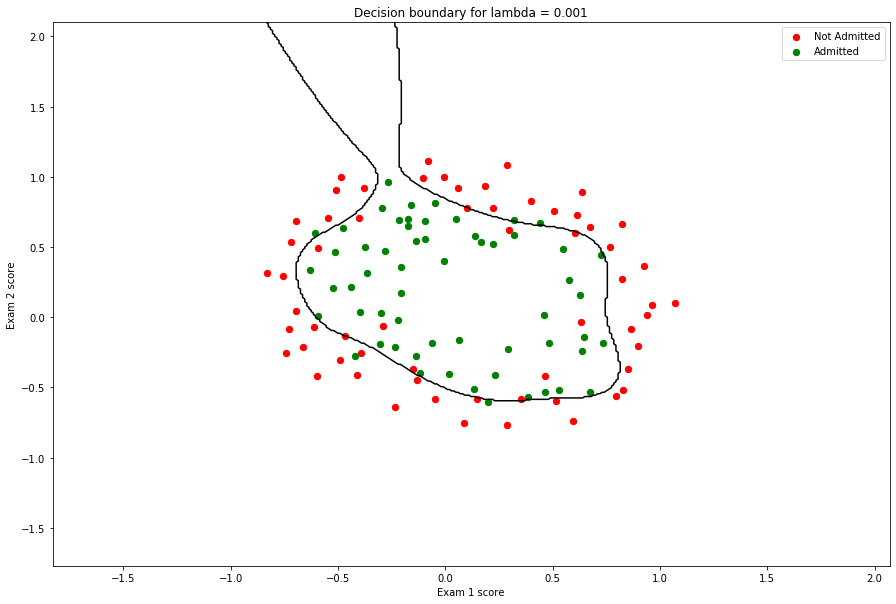

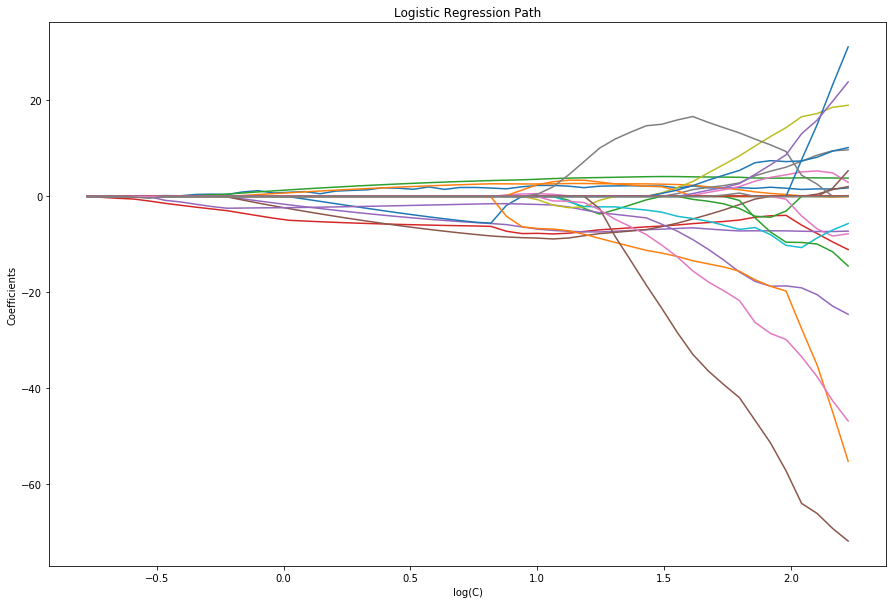

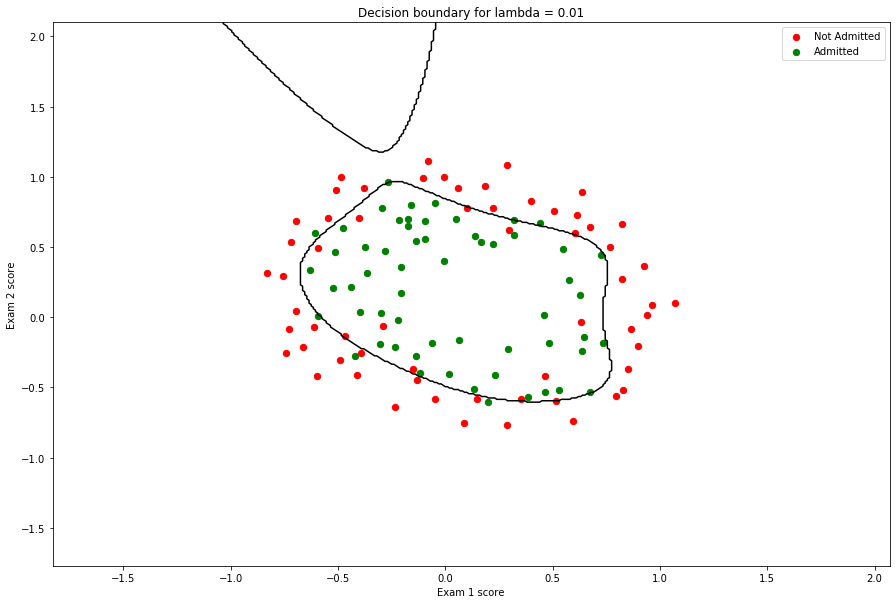

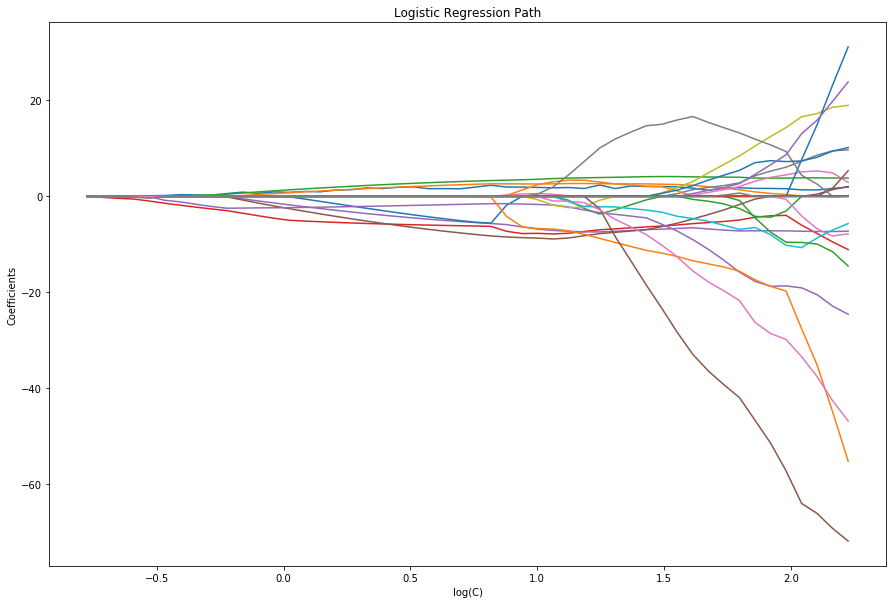

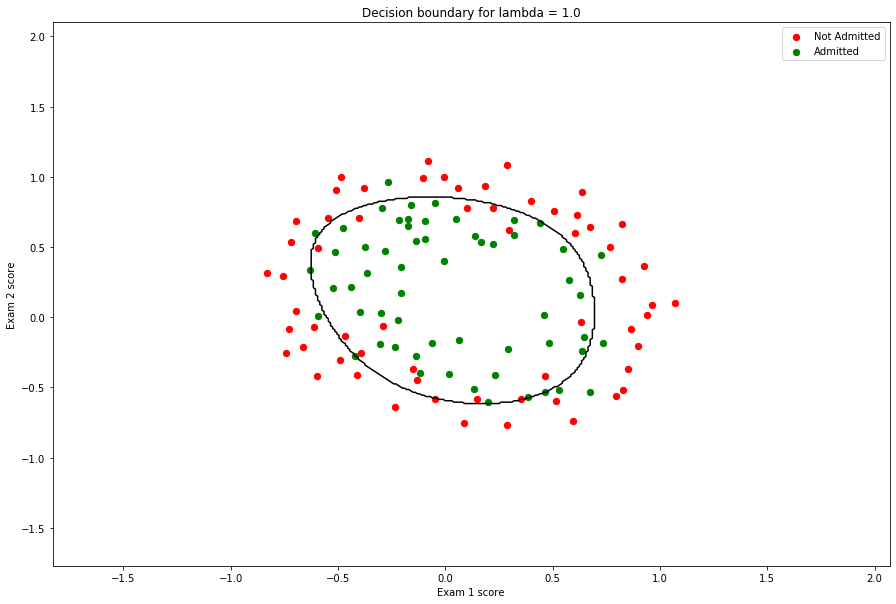

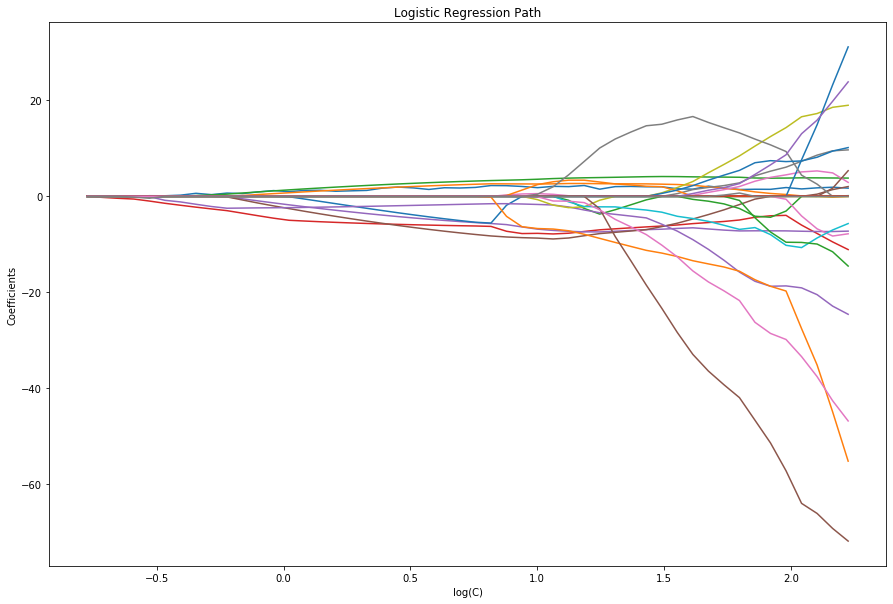

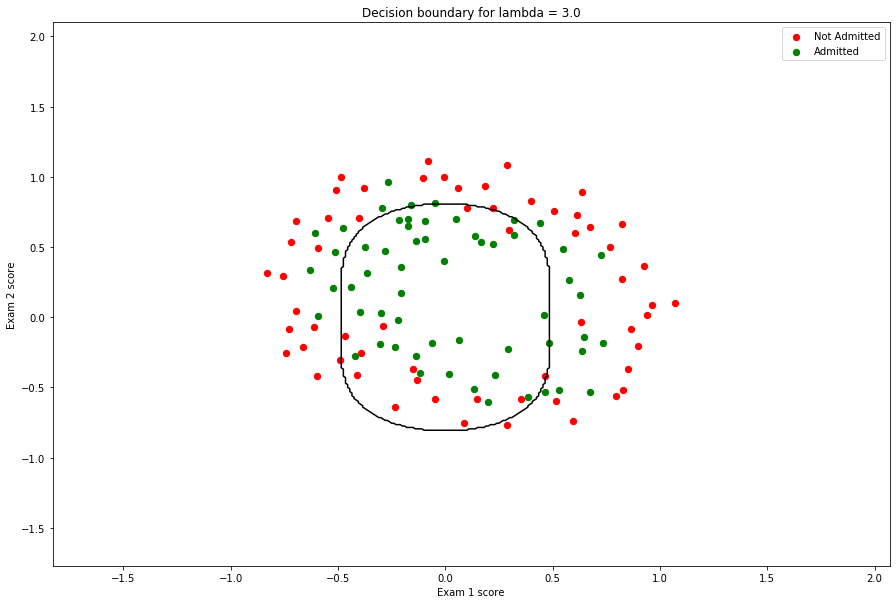

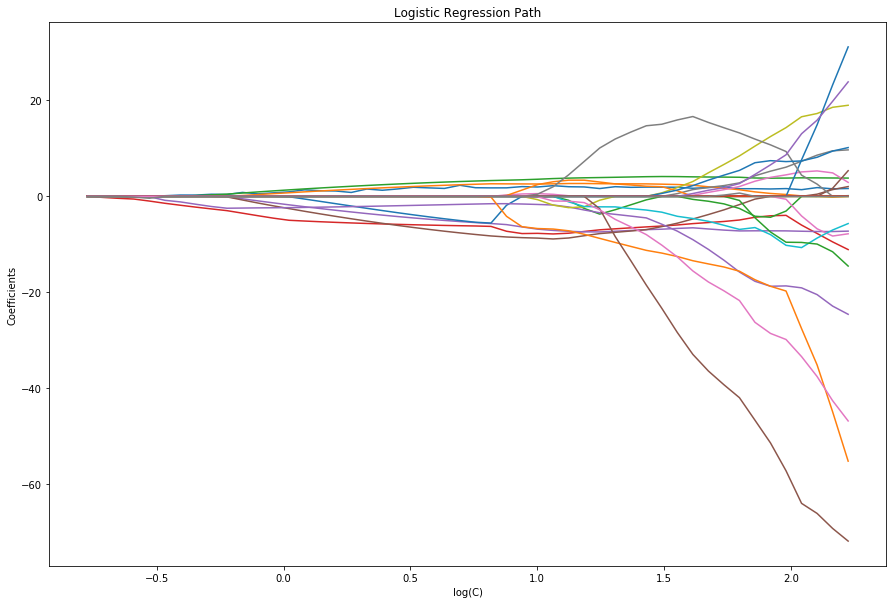

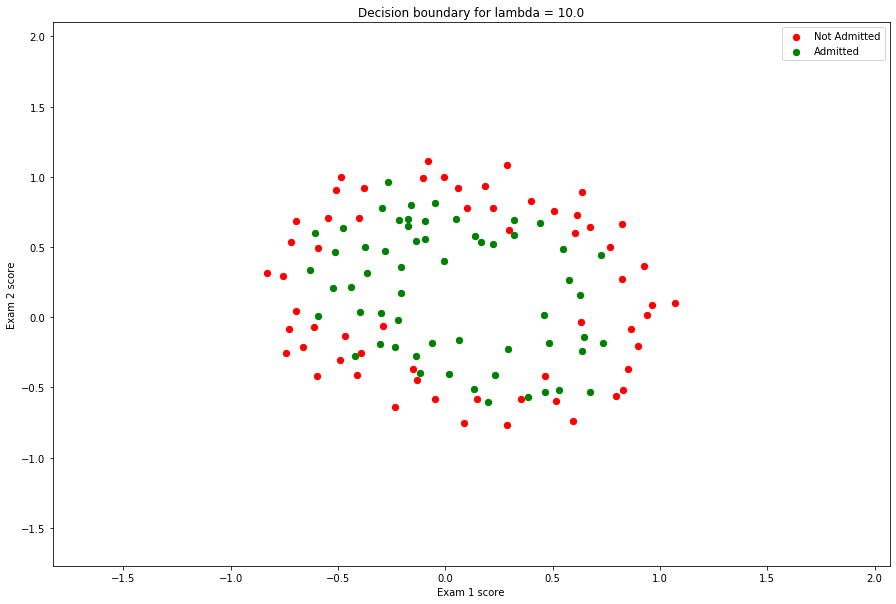

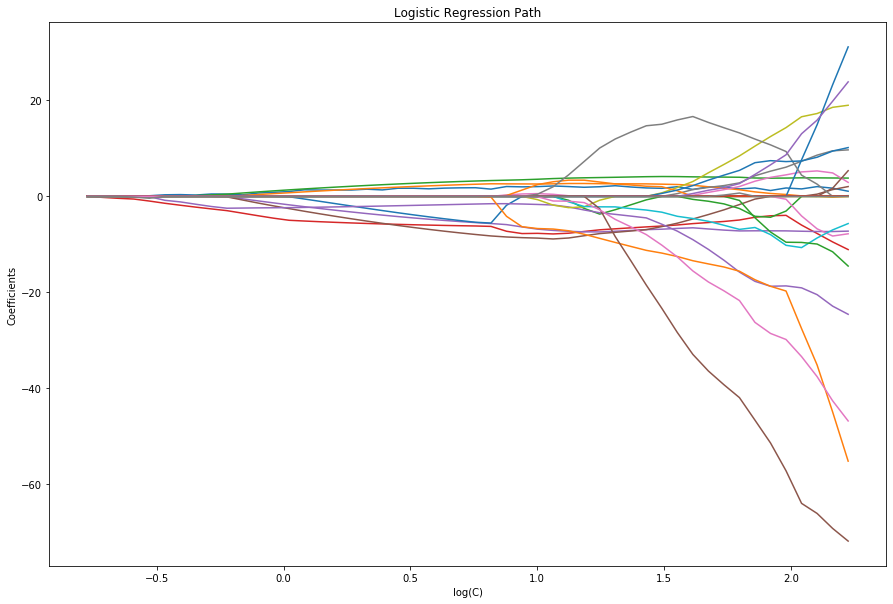

In [12]:
# L1 regularization witk sklearn LogisticRegression
reg_l = [0.001,0.01,1.0,3.0,10.0]
for reg in reg_l:

    sk_logreg_l1 = linear_model.LogisticRegression(C=1.0/reg,solver='liblinear',fit_intercept=False,penalty='l1')
    sk_logreg_l1.fit(XX,y)
    print("Theta found by sklearn with L1 reg: %s" %sk_logreg_l1.coef_)
    print("Loss with sklearn theta: %.4f" %reg_lr1.loss(sk_logreg_l1.coef_[0],XX,y,0.0))

    plot_utils.plot_decision_boundary_sklearn_poly(X,y,sk_logreg_l1,reg,p,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])
    #plt.show()
    plt.savefig('decsion_boundry_L1_reg = %d.png' %reg)
# plot regularization paths for L1 regression
# Exploration of L1 regularization 
# 
    plot_utils.plot_regularization_path(XX,y)
    plt.savefig('Coefficient_L1_reg = %d.png' %reg)
    #plt.show()

In [40]:
%run -i "grader.py"

========== START GRADING
----- START PART 4A1
----- END PART 4A1 [took 0:00:00.000059, 5/5 points]
----- START PART 4A2.1
----- END PART 4A2.1 [took 0:00:00.000333, 3/3 points]
----- START PART 4A2.2
----- END PART 4A2.2 [took 0:00:00.000229, 2/2 points]
----- START PART 4A3
Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 19
         Function evaluations: 20
         Gradient evaluations: 20
----- END PART 4A3 [took 0:00:00.014778, 5/5 points]
----- START PART 4B1.1
----- END PART 4B1.1 [took 0:00:00.000253, 5/5 points]
----- START PART 4B1.2
----- END PART 4B1.2 [took 0:00:00.000194, 5/5 points]
----- START PART 4B2
         Current function value: nan
         Iterations: 1
         Function evaluations: 20
         Gradient evaluations: 20
----- END PART 4B2 [took 0:00:00.011737, 2/2 points]
----- START PART 4C1_1
----- END PART 4C1_1 [took 0:00:00.000030, 1/1 points]
----- START PART 4C1_2
----- END PART 4C1_2 [took 0:00:00.00003

/Users/zhuqing/Documents/Github/Statistic-Machine-Learning/hw2/logreg/logistic_regressor.py:217: RuntimeWarning: divide by zero encountered in log
  J = 1/m * np.sum(-np.matmul(y,np.log(utils.sigmoid(z))) - np.matmul((1-y),np.log(1-utils.sigmoid(z)))) + reg/m/2*np.sum(np.square(theta[1:]))
/Users/zhuqing/Documents/Github/Statistic-Machine-Learning/hw2/logreg/logistic_regressor.py:217: RuntimeWarning: divide by zero encountered in log
  J = 1/m * np.sum(-np.matmul(y,np.log(utils.sigmoid(z))) - np.matmul((1-y),np.log(1-utils.sigmoid(z)))) + reg/m/2*np.sum(np.square(theta[1:]))


<Figure size 1080x720 with 0 Axes>